In [9]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 21:21:34.117025


In [10]:
%cd /content
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git
!cd EVA-4/PHASE_1/S9/

/content
Cloning into 'EVA-4'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 388
Receiving objects: 100% (394/394), 4.18 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [11]:
%cd EVA-4/PHASE_1/S9/

/content/EVA-4/PHASE_1/S9


In [12]:
%ls Models/

model.py  QuizDNN.py  README.md  resnet.py


# Import Library

In [13]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
!pip install albumentations

In [14]:
from Transform_utils.transform_albumentation import Data
data = Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
# import load_transform
# # Initialize CIFAR-10 classes
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


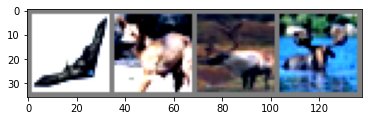

In [16]:
import display
# get some random training images
dataiter = iter(trainloader1)
#dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
from Models import QuizDNN

In [18]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = QuizDNN.Net().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14      

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.95, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# train and test

In [0]:
import train 
import validation

In [21]:
losses = []
accuracies = []

epochs = 25
for epoch in range(1, epochs + 1):
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print(f'Epoch {epoch}:')
    train.train(net, trainloader, device, optimizer, criterion)
    validation.val(net, testloader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.01
Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 6477/10000 (64.77%)

lr=  0.01
Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 7103/10000 (71.03%)

lr=  0.01
Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 7674/10000 (76.74%)

lr=  0.01
Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 7932/10000 (79.32%)

lr=  0.01
Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8013/10000 (80.13%)

lr=  0.01
Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0038, Accuracy: 8335/10000 (83.35%)

lr=  0.01
Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0037, Accuracy: 8334/10000 (83.34%)

lr=  0.01
Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0036, Accuracy: 8451/10000 (84.51%)

lr=  0.01
Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0036, Accuracy: 8452/10000 (84.52%)

lr=  0.01
Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0035, Accuracy: 8473/10000 (84.73%)

lr=  0.01
Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0035, Accuracy: 8536/10000 (85.36%)

lr=  0.01
Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0033, Accuracy: 8603/10000 (86.03%)

lr=  0.01
Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0033, Accuracy: 8550/10000 (85.50%)

lr=  0.01
Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0033, Accuracy: 8619/10000 (86.19%)

lr=  0.01
Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0033, Accuracy: 8617/10000 (86.17%)

lr=  0.01
Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8647/10000 (86.47%)

lr=  0.01
Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8684/10000 (86.84%)

lr=  0.01
Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0031, Accuracy: 8724/10000 (87.24%)

lr=  0.01
Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8674/10000 (86.74%)

lr=  0.005
Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8780/10000 (87.80%)

lr=  0.005
Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8817/10000 (88.17%)

lr=  0.005
Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8821/10000 (88.21%)

lr=  0.005
Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0031, Accuracy: 8786/10000 (87.86%)

lr=  0.005
Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0031, Accuracy: 8796/10000 (87.96%)

lr=  0.005
Epoch 25:


Loss=0.17 Batch ID=390 Accuracy=96.69: 100%|██████████| 391/391 [00:26<00:00, 15.87it/s]



Validation set: Average loss: 0.0031, Accuracy: 8820/10000 (88.20%)



# Plot Result

In [0]:
%matplotlib inline
import plot

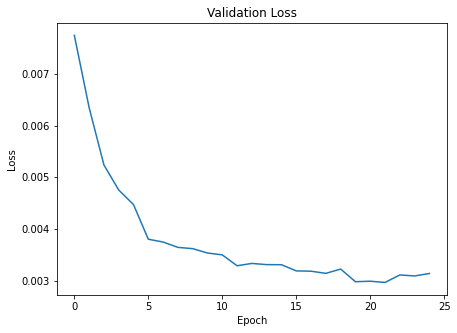

In [23]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

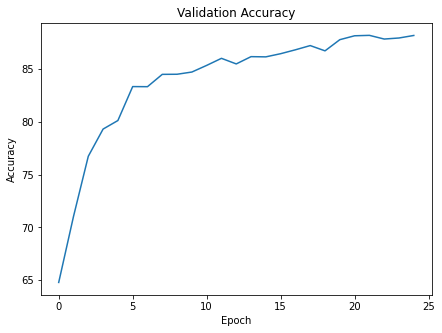

In [24]:
plot.plot_metric(accuracies, 'Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    car horse  frog  frog


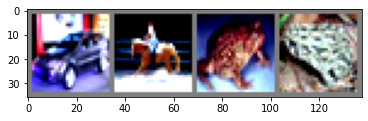

In [25]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images.cuda())

In [27]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    car horse  frog  frog


# Result Analysis


In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(testloader1, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 88 %
Accuracy of   car : 95 %
Accuracy of  bird : 85 %
Accuracy of   cat : 76 %
Accuracy of  deer : 90 %
Accuracy of   dog : 80 %
Accuracy of  frog : 91 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 90 %
